In [1]:
import seaborn as sns; sns.set()
%matplotlib inline
import numpy
import scipy

In [2]:
from intake import cat
list(cat)

/Users/john/miniconda3/envs/daytum/lib/python3.7/site-packages/intake/source/discovery.py:138: FutureWarning: The drivers ['sql_cat', 'sql', 'sql_auto', 'sql_manual'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


['AI_grid',
 'MV_2D_200wells',
 'petrophysical',
 'poro_perm',
 'porosity_1D',
 'production',
 'sample_data',
 'sample_data_MV_biased',
 'sample_data_biased',
 'siesmic',
 'unconv_MV',
 'wells']

In [3]:
list(cat.wells)

['tickers_by_state',
 'well_location_by_ticker_and_state',
 'well_location_by_api',
 'well_columns']

In [4]:
list(cat.production)

['production_by_state',
 'production_by_api',
 'production_columns',
 'apis_with_production_data_by_state',
 'production_by_ticker_and_state']

In [5]:
df = cat.production.production_by_ticker_and_state(state='ND', ticker='EOG').read().set_index(['api', 'date']); df

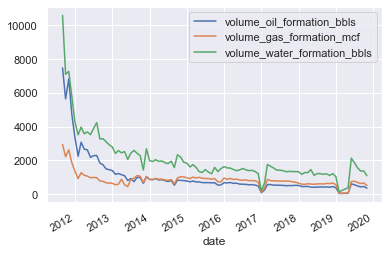

In [7]:
df.loc['33013015180000', 'volume_oil_formation_bbls':'volume_water_formation_bbls'].plot();

In [8]:
cat.poro_perm.read()

,porosity,permeability
0,0.105,47.46
1,0.105,29.75
2,0.112,37.56
3,0.085,18.38
4,0.138,75.03
...,...,...
379,0.095,30.89
380,0.097,34.12
381,0.103,42.03
382,0.102,56.11


In [9]:
cat.wells.tickers_by_state(state='NM').read()

,parent_ticker
0,ADR
1,AGHN_P
2,ALMO_P
3,ALTA_P
4,AMER_P
...,...
144,WTI
145,XCO
146,XEC
147,XOM
